In [91]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow import keras

In [92]:
df_heart = pd.read_csv("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Sistemas de Aprendizaxe Automático\\practicas\\heart_attack\\heart-attack-analysis-prediction-dataset\\heart.csv")
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Sacar variables de entrenamiento y test

In [93]:
from sklearn.model_selection import train_test_split
X, y = df_heart.drop('output', axis=1), df_heart['output']
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

## Escalado de los valores

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [95]:
np.random.seed(42)

In [96]:
X_train.shape

(170, 13)

In [141]:
dimension_entrada = X_train.shape[1]
dimension_salida = 1    # Capa de salida binaria (o 0 o 1)

modelo = Sequential()
modelo.add(Dense(20, input_dim = dimension_entrada, activation="relu"))
modelo.add(Dense(20, activation="relu"))
modelo.add(Dense(20, activation="relu"))
modelo.add(Dense(1, activation="sigmoid"))
sgd = SGD(learning_rate=0.001)

# En clasificación se suele añadir un parámetro más, las métricas.
modelo.compile(loss="binary_crossentropy", optimizer=sgd,
               metrics=["accuracy", "recall"])

modelo.summary()

c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 20)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,141 (4.46 KB)

 Trainable params: 1,141 (4.46 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
epochs = 100000
batch_size = 20

early_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)


historia = modelo.fit(X_train, y_train, epochs=epochs,
                      batch_size = batch_size,
                      validation_data=(X_val, y_val),
                      callbacks=[early_stopping])

Epoch 1/100000


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5649 - loss: 0.6797 - recall: 0.3755 - val_accuracy: 0.5965 - val_loss: 0.6632 - val_recall: 0.3793
Epoch 2/100000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5230 - loss: 0.6888 - recall: 0.3838 - val_accuracy: 0.6140 - val_loss: 0.6622 - val_recall: 0.4138
Epoch 3/100000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5599 - loss: 0.6807 - recall: 0.3730 - val_accuracy: 0.6140 - val_loss: 0.6612 - val_recall: 0.4138
Epoch 4/100000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5689 - loss: 0.6743 - recall: 0.3842 - val_accuracy: 0.6316 - val_loss: 0.6603 - val_recall: 0.4483
Epoch 5/100000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6046 - loss: 0.6702 - recall: 0.4331 - val_accuracy: 0.6491 - val_loss: 0.6594 - val_recall: 0.4828
Epoch 6/100000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6163 - loss: 0.6760 - recall: 0.4710 - val_accuracy: 0.6491 - val_loss: 0.6585 - val_recall: 0.4828
Epoch 7/100000
9/9

<Axes: >

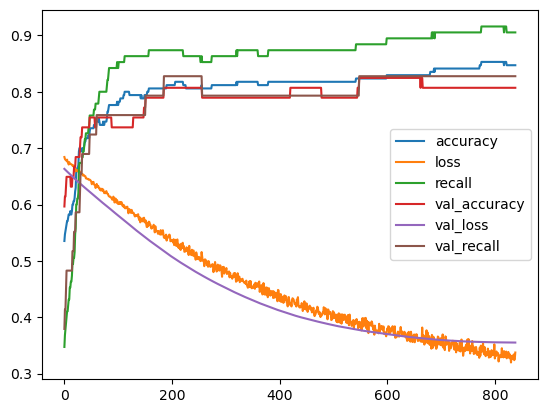

In [143]:
pd.DataFrame(historia.history).plot()

> Predicciones

In [144]:
y_pred = modelo(X_test[0:10])
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[3.4273562e-01],
       [4.4706079e-01],
       [9.1661030e-01],
       [1.0602674e-02],
       [8.5493630e-01],
       [8.6130691e-01],
       [8.2274771e-01],
       [4.4970130e-04],
       [6.2324023e-03],
       [4.7285247e-01]], dtype=float32)>

> Valores reales

In [145]:
y_test[0:10]

179    0
228    0
111    1
246    0
60     1
9      1
119    1
223    0
268    0
33     1
Name: output, dtype: int64

In [146]:
mse_test = modelo.evaluate(X_test, y_test)
mse_test

#  accuracy: 0.8534 - loss: 0.4045 - recall: 0.9113 (3 capas de 20)
#  

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8627 - loss: 0.3704 - recall: 0.8423 


[0.33959853649139404, 0.8815789222717285, 0.8780487775802612]